###UnSupervised Learning


### Dataset Information: 
####### The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer andgyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. 

####### The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30%the test data.

####### The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain.It includes labels of postural transitions between activities and also the full raw inertial signals instead of the ones pre-processed into windows. 

### ATTRIBUTES:

Each column in this dataset is collected from differnt triaxial accelerometer sensor.

The features F1 to F20 are  the maginitude values computed from the values of each sensor using the formulat sqrt (x^2 +y^2 + z^2). 

These x , y and z values of each sensor will differ based on movement of the person.

Activity column have six differnt levels (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING). This column you may not need to form the clusters, but it can be useful in evaluating the quality of your cluster groups. 


In [4]:
# import all libraries and dependencies for dataframe

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta

# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
sns.set(style='darkgrid')
import matplotlib.ticker as plticker
%matplotlib inline

# import all libraries and dependencies for machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

# import all libraries and dependencies for clustering
from sklearn.metrics import silhouette_score,accuracy_score
from sklearn.cluster import KMeans,DBSCAN
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [160]:
df = pd.read_csv('data_set.csv')
df.head()

,activity,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20
0,STANDING,0.2165,1.7321,1.7211,1.7055,1.7321,1.5658,1.7143,1.7009,0.2995,1.0063,1.7246,0.1280,1.7309,1.7124,1.7321,1.7315,1.7321,1.7321,1.4088,1.4787
1,STANDING,0.2005,1.7321,1.7113,1.7015,1.7321,1.4832,1.7183,1.7101,0.7715,1.0119,1.7252,0.1199,1.7303,1.6980,1.7321,1.7321,1.7321,1.7321,1.4046,1.1015
2,STANDING,0.3924,1.7321,1.7269,1.7257,1.7321,1.6730,1.7269,1.7274,0.5240,1.0085,1.7303,0.3193,1.7321,1.7205,1.7321,1.7321,1.7321,1.7321,1.4123,1.4365
3,STANDING,0.3472,1.7321,1.7096,1.6357,1.7315,1.4833,1.5978,1.5255,0.2771,0.8802,1.6719,0.1661,1.7165,1.7130,1.7321,1.7166,1.7286,1.7321,1.2625,1.4150
4,STANDING,0.2522,1.7321,1.7280,1.7257,1.7321,1.7160,1.7251,1.7251,0.4298,0.9271,1.7303,0.1819,1.7321,1.7211,1.7321,1.7321,1.7321,1.7321,1.4107,1.0265


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   activity  1433 non-null   object 
 1   F1        1433 non-null   float64
 2   F2        1433 non-null   float64
 3   F3        1433 non-null   float64
 4   F4        1433 non-null   float64
 5   F5        1433 non-null   float64
 6   F6        1433 non-null   float64
 7   F7        1433 non-null   float64
 8   F8        1433 non-null   float64
 9   F9        1433 non-null   float64
 10  F10       1433 non-null   float64
 11  F11       1433 non-null   float64
 12  F12       1433 non-null   float64
 13  F13       1433 non-null   float64
 14  F14       1433 non-null   float64
 15  F15       1433 non-null   float64
 16  F16       1433 non-null   float64
 17  F17       1433 non-null   float64
 18  F18       1433 non-null   float64
 19  F19       1433 non-null   float64
 20  F20       1433 non-null   floa

In [162]:
df.shape

(1433, 21)

In [163]:
print('Number of rows in dataset are',df.shape[0])
print('Number of columns in dataset are',df.shape[1])
print('Number of Categorical columns in dataset are',len(df.select_dtypes(exclude=np.number).columns.tolist()))
print('Number of Numerical columns in dataset are',len(df.select_dtypes(include=np.number).columns.tolist()))

Number of rows in dataset are 1433
Number of columns in dataset are 21
Number of Categorical columns in dataset are 1
Number of Numerical columns in dataset are 20


In [165]:
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
F1,1433.0000,0.3899,0.2359,0.0136,0.2129,0.3317,0.5242,1.5695
F2,1433.0000,1.2269,0.4687,0.1504,0.8164,1.2041,1.7321,1.7321
F3,1433.0000,1.3845,0.3710,0.3174,1.0715,1.6041,1.7142,1.7303
F4,1433.0000,1.2029,0.5286,0.1019,0.7042,1.5362,1.7004,1.7292
F5,1433.0000,1.6887,0.0759,0.9215,1.6734,1.7303,1.7321,1.7321
F6,1433.0000,1.4423,0.1125,0.8409,1.3915,1.4328,1.4981,1.7234
F7,1433.0000,1.3332,0.4035,0.2841,0.9423,1.6182,1.7142,1.7297
F8,1433.0000,1.3702,0.3499,0.3237,1.0568,1.5075,1.7055,1.7297
F9,1433.0000,0.8337,0.3509,0.0198,0.5550,0.8645,1.1061,1.5891
F10,1433.0000,0.9693,0.1833,0.3042,0.8389,0.9526,1.0953,1.4207


AxesSubplot(0.125,0.125;0.775x0.755)


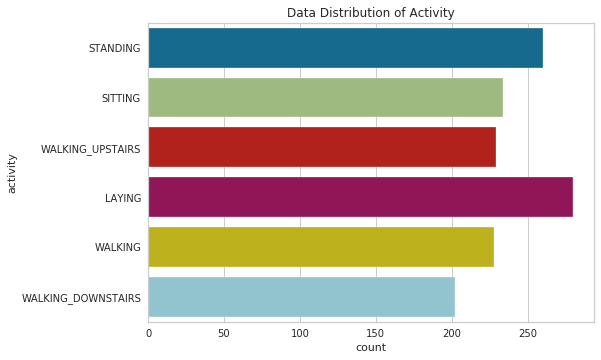

In [249]:
cat_df = df.select_dtypes(exclude=np.number)
for col in  cat_df.columns:
    print(sns.countplot(data=df,y=df[col]))
    plt.title("Data Distribution of Activity")
plt.show()


In [167]:
df['activity'].value_counts(normalize=True)*100

LAYING               19.5394
STANDING             18.1438
SITTING              16.3294
WALKING_UPSTAIRS     15.9805
WALKING              15.9107
WALKING_DOWNSTAIRS   14.0963
Name: activity, dtype: float64

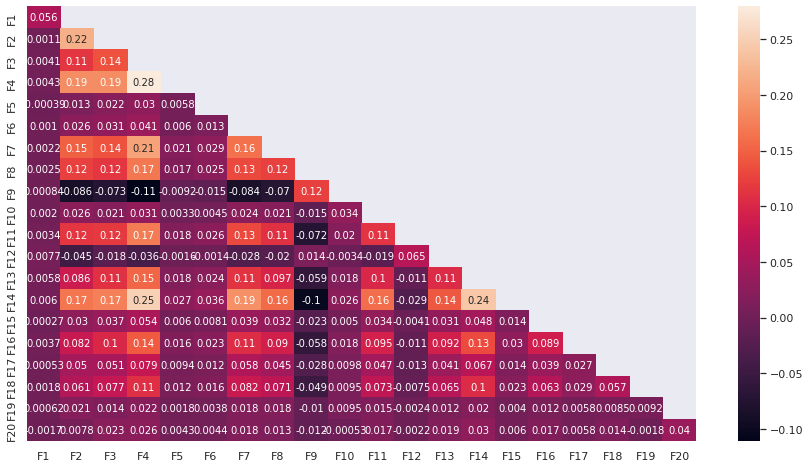

In [168]:
plt.figure(figsize=[15,8])
sns.heatmap(df.cov(),annot=True,mask = np.triu(df.cov(),k=1))

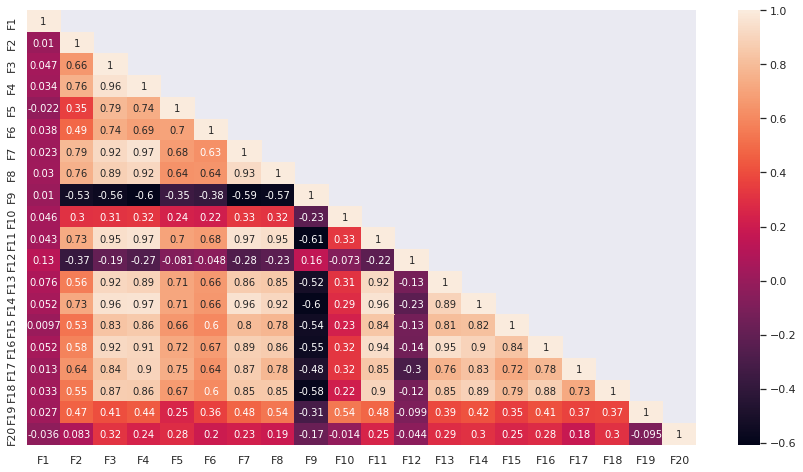

In [169]:
plt.figure(figsize=[15,8])
sns.heatmap(df.corr(),annot=True,mask = np.triu(df.corr(),k=1))

In [170]:
print('Number of missing value in Dataset : ',df.isnull().sum().sum())

Number of missing value in Dataset :  0


In [171]:
num_df = df.select_dtypes(include=np.number)

In [172]:
ss = StandardScaler()
scaled_data = ss.fit_transform(df.drop(columns='activity'))
scaled_data = pd.DataFrame(scaled_data,columns=num_df.columns)
scaled_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20
0,-0.7352,1.0780,0.9077,0.9510,0.5709,1.0980,0.9447,0.9455,-1.5228,0.2019,0.9336,-1.2314,0.7966,0.9254,0.7269,0.8092,0.7752,0.7641,0.1054,1.1901
1,-0.8031,1.0780,0.8813,0.9434,0.5709,0.3637,0.9545,0.9718,-0.1772,0.2323,0.9353,-1.2629,0.7948,0.8960,0.7269,0.8111,0.7752,0.7641,0.0609,-0.7060
2,0.0104,1.0780,0.9233,0.9892,0.5709,2.0511,0.9759,1.0213,-0.8828,0.2140,0.9506,-0.4817,0.8001,0.9418,0.7269,0.8111,0.7752,0.7641,0.1422,0.9778
3,-0.1809,1.0780,0.8767,0.8188,0.5632,0.3643,0.6560,0.4441,-1.5866,-0.4862,0.7771,-1.0821,0.7522,0.9265,0.7269,0.7594,0.7543,0.7641,-1.4245,0.8700
4,-0.5838,1.0780,0.9264,0.9892,0.5709,2.4333,0.9716,1.0147,-1.1513,-0.2306,0.9506,-1.0200,0.8001,0.9430,0.7269,0.8111,0.7752,0.7641,0.1253,-1.0827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,0.2225,-1.1374,-0.7422,-0.8727,-0.2961,-0.7130,-0.9559,-1.0774,-0.3481,-1.1835,-0.8086,0.4803,-0.3650,-0.6649,-0.0243,-0.4751,-0.8605,-0.0538,-0.4350,1.1549
1429,-0.0177,-1.4971,-0.6642,-0.8833,0.0924,-0.1337,-1.0280,-0.6819,1.4513,-1.1678,-0.7866,0.2169,-0.1979,-0.6525,-1.0659,-0.4532,-0.5801,-0.0117,-0.1864,0.4844
1430,-1.0165,-1.3155,-0.4908,-0.4854,0.1305,0.1480,-1.0323,-0.8703,0.4543,-1.0686,-0.7810,0.9781,-0.3230,-0.6102,0.3620,-0.4150,-0.4989,-0.1331,-0.0389,0.5198
1431,-0.6774,-1.4289,-0.2572,-0.5089,0.2139,-0.0210,-0.7305,-0.4817,0.3761,-1.0303,-0.6150,0.6672,-0.0762,-0.4068,0.3568,-0.2409,-0.3785,0.0440,-0.0778,0.9900


### 3.	Dimensionality Reduction

With respect to correlation view, features which have high correlation will affect the target variable. Because in relation both shows same view of direction and strength, so one varaiable is enough for the entire dataset. we have to reduce the feature if possible.This can be done by some of the Dimensionality reduction technics

In [173]:
pca_data = df.copy()
pca_data = pca_data.drop(columns= 'activity')
cov_matrix = np.cov(pca_data.T)
eigen_value, eigen_vector = np.linalg.eig(cov_matrix)
print('Eigen value : ','\n',eigen_value)
print('Eigen vector : ','\n',eigen_vector)

Eigen value :  
 [1.45377792e+00 1.22578135e-01 7.55440971e-02 6.14630961e-02
 4.62519928e-02 3.74846202e-02 2.97883970e-02 1.89838046e-02
 1.61968735e-02 1.03005176e-02 1.01832521e-02 7.69405846e-03
 1.21415046e-03 1.43408662e-03 1.80052677e-03 5.15251586e-03
 4.53867106e-03 3.97240316e-03 2.80483123e-03 3.15880446e-03]
Eigen vector :  
 [[ 7.38977993e-03  9.36725315e-02  5.57886620e-02 -7.60183865e-01
   6.35164131e-01  2.97549216e-02 -1.03235931e-02  8.03146464e-03
   3.05211097e-02 -5.70684479e-02 -1.64703434e-02 -1.56640263e-02
  -1.22475889e-02 -1.17005066e-02  1.56735556e-02  4.72474891e-03
  -1.07908196e-02  8.02160874e-03  1.56196984e-02  2.10331846e-03]
 [ 3.06786080e-01 -7.61852969e-01  1.18001976e-01 -2.57814556e-01
  -2.07941836e-01  2.86101235e-01  6.92957510e-02  3.98117499e-02
  -2.54262186e-01  7.18695122e-02  3.86524826e-02 -1.56418420e-01
  -5.94888177e-03 -1.11394387e-01  8.17631032e-03 -1.76036363e-02
   6.28442477e-02 -1.49775756e-02 -9.20105262e-03  2.71015640e-0

In [174]:
exp_var = []
for i in eigen_value:
    exp_var.append((i/sum(eigen_value))*100)
    
print(exp_var)

[75.9421533448178, 6.4032114795711275, 3.9462570654323166, 3.210696620360889, 2.4161021214089966, 1.9581139101895986, 1.5560801785193834, 0.991672095069693, 0.8460889576439222, 0.5380763270289827, 0.5319506382629121, 0.4019206490804489, 0.06342454299366901, 0.07491352323964441, 0.09405554825221238, 0.26915606767071043, 0.237090168737186, 0.20750958244129858, 0.1465181990940394, 0.1650089801852058]


In [175]:
np.cumsum(exp_var)

array([ 75.94215334,  82.34536482,  86.29162189,  89.50231851,
        91.91842063,  93.87653454,  95.43261472,  96.42428682,
        97.27037577,  97.8084521 ,  98.34040274,  98.74232339,
        98.80574793,  98.88066145,  98.974717  ,  99.24387307,
        99.48096324,  99.68847282,  99.83499102, 100.        ])

To determine 90% of the variance in data,By calculating the proportion of eigen_value for each variance finding the top 4 components can hold 90% of variance 

In [176]:
eigen_vector[:,1:5]

array([[ 0.09367253,  0.05578866, -0.76018386,  0.63516413],
       [-0.76185297,  0.11800198, -0.25781456, -0.20794184],
       [ 0.18643946,  0.06372322,  0.04780059,  0.02985181],
       [ 0.04087959,  0.09120426,  0.04204664,  0.024663  ],
       [ 0.0731357 ,  0.02580486,  0.03742297, -0.00389746],
       [ 0.04803183,  0.02311931, -0.02042725, -0.0453941 ],
       [-0.04317523,  0.08047302,  0.00696593, -0.03464619],
       [-0.01464818,  0.05095062, -0.05413104, -0.11476712],
       [ 0.14874831,  0.95208482, -0.01860616, -0.13076395],
       [-0.04487759,  0.00115167, -0.12447767, -0.10700614],
       [ 0.0731717 ,  0.01656273, -0.00444197, -0.0227475 ],
       [ 0.37684563, -0.18711428, -0.52030292, -0.67467673],
       [ 0.26588996,  0.04716443,  0.00159042,  0.02003652],
       [ 0.11361394,  0.04694869,  0.02844231,  0.05311461],
       [ 0.07160706, -0.0178583 ,  0.02931269, -0.00199097],
       [ 0.22268238,  0.00726175,  0.0202254 , -0.00690972],
       [ 0.00862292,  0.

In [177]:
pca_four_df = pd.DataFrame(eigen_vector[:,1:5],columns=['PCA1','PCA2','PCA3','PCA4'])

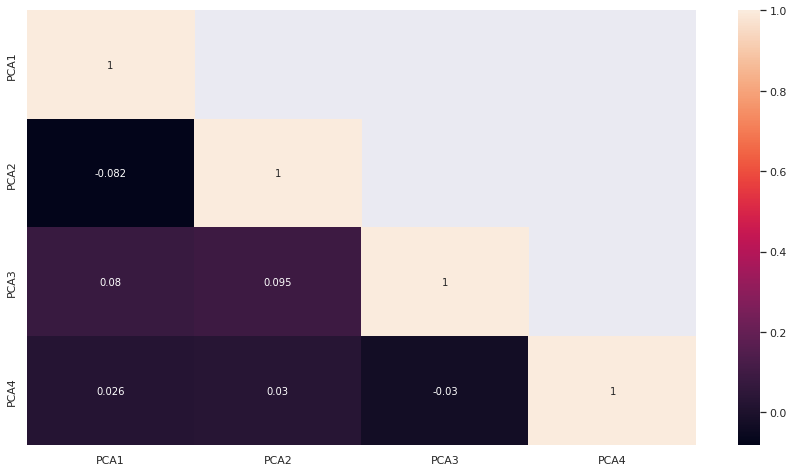

In [61]:
plt.figure(figsize=[15,8])
sns.heatmap(pca_four_df.corr(),annot=True,mask = np.triu(pca_four_df.corr(),k=1))

There is no Multicollinearity exists within the PCA data

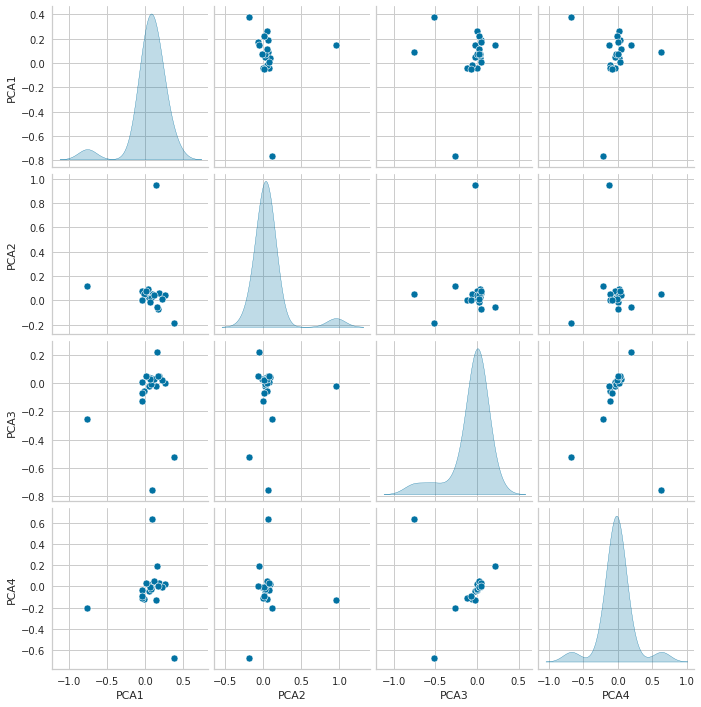

In [241]:
sns.pairplot(data=pca_four_df,diag_kind='kde')

for outliers in the PCA data and treat the same.

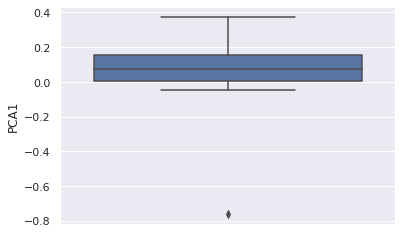

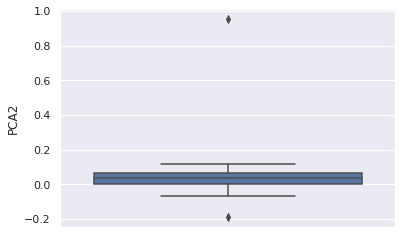

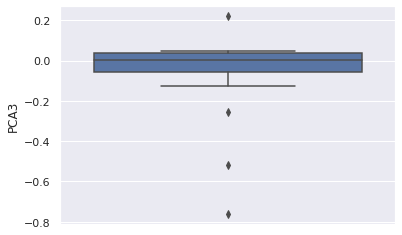

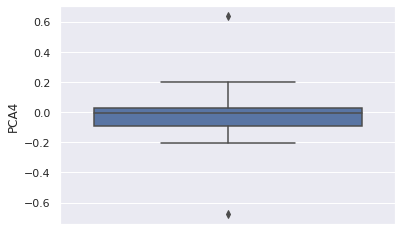

In [72]:
for col in pca_four_df.columns:
    sns.boxplot(data=pca_four_df,y=col)
    plt.show()

In [178]:
q1 = pca_four_df.quantile(0.25)
q3 = pca_four_df.quantile(0.75)

IQR = q3 - q1

ul = q3 + 1.5 * IQR
ll = q1 - 1.5 * IQR

pca_four_outlied = pca_four_df[~((pca_four_df>ul)|(pca_four_df<ll).any(axis=1))]

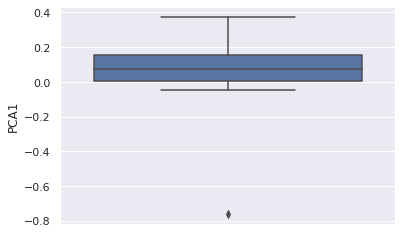

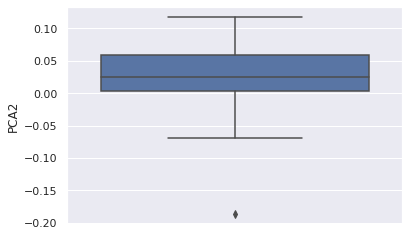

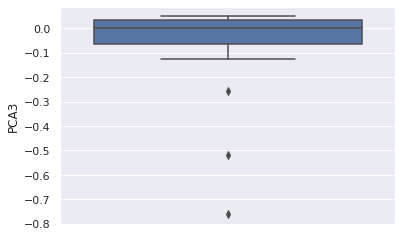

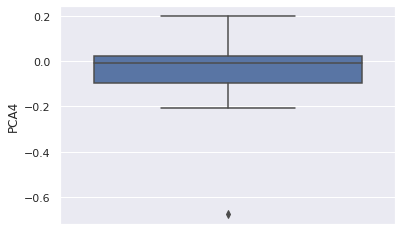

In [93]:
for col in pca_four_outlied.columns:
    sns.boxplot(data=pca_four_outlied,y=col)
    plt.show()

Below PCA model was build with sklearn model without manual calculation,but perviously tried to find the 90% contribution of variance.Found both the result and took PCA model component with 7 feature variance

In [179]:
pca_model = PCA(n_components=0.90,random_state = 1)
pca_model_data = pca_model.fit_transform(scaled_data)
pca_model_df = pd.DataFrame(pca_model_data,columns=['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8'])
pca_model_df

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8
0,-3.6094,0.2477,-1.4778,-0.1542,-0.7461,0.2541,-0.3591,-0.7652
1,-3.0537,-0.6153,-1.2705,0.0151,0.8795,-0.2968,0.4000,0.2718
2,-3.6952,0.4288,-0.3210,0.0373,-0.3246,-0.1744,-1.0056,-0.7886
3,-2.8135,1.2302,-1.6262,0.8938,-0.3320,0.4497,0.4620,-0.9387
4,-3.6386,-0.4123,-0.8336,0.1016,1.5712,0.0535,-0.6852,-1.2530
...,...,...,...,...,...,...,...,...
1428,2.3876,1.5853,0.0905,0.1221,-0.8495,0.7558,0.0063,-0.1124
1429,2.5920,1.3345,0.2959,-0.3591,0.1832,-0.8224,-0.4302,0.6498
1430,1.8962,1.4996,0.2254,-1.3412,0.3659,0.3437,-0.3327,0.0870
1431,1.3279,1.7152,0.1494,-1.0106,-0.1054,0.1841,-0.1801,0.2896


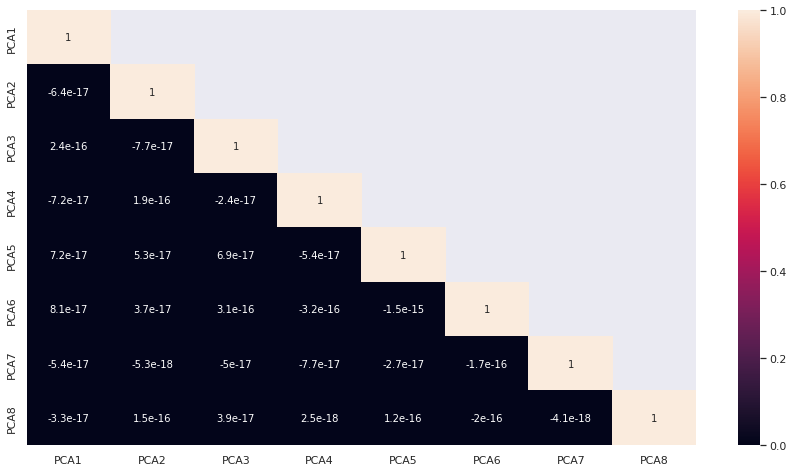

In [180]:
plt.figure(figsize=[15,8])
sns.heatmap(pca_model_df.corr(),annot=True,mask = np.triu(pca_model_df.corr(),k=1))

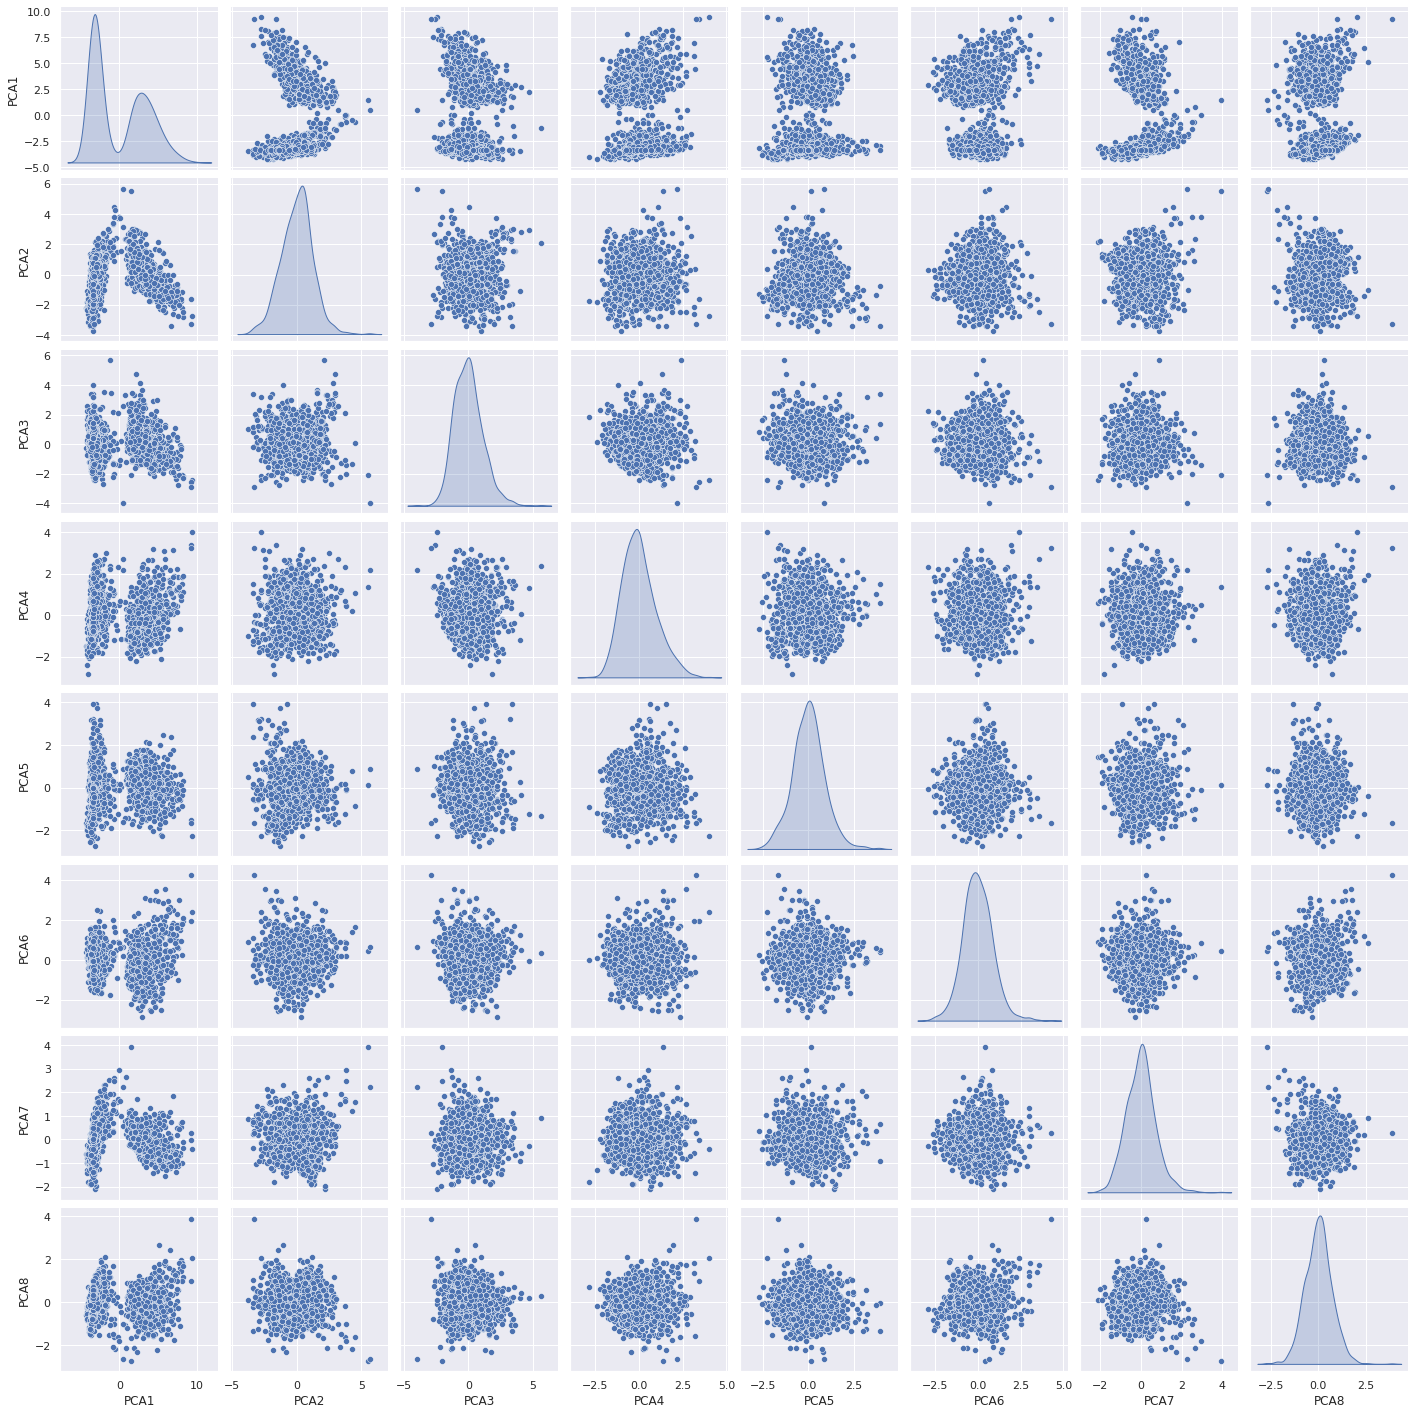

In [78]:
sns.pairplot(data=pca_model_df,diag_kind='kde')

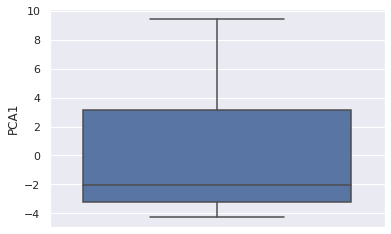

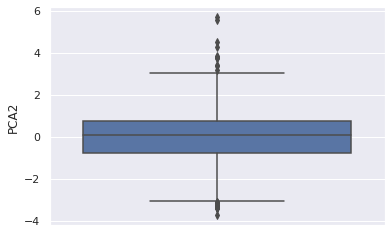

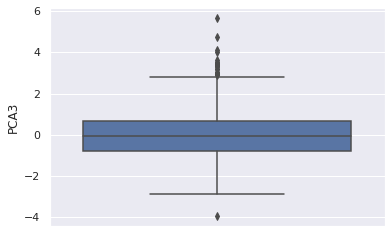

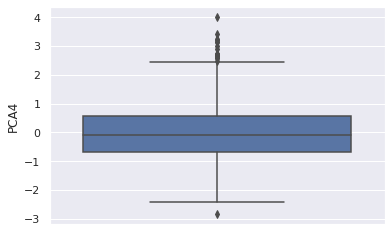

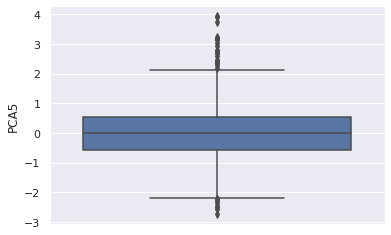

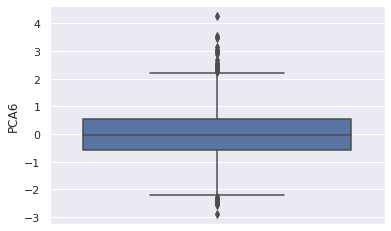

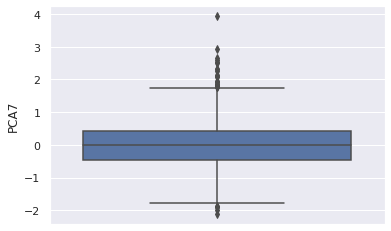

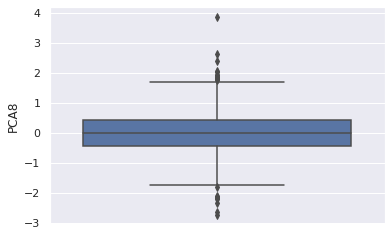

In [82]:
for col in pca_model_df.columns:
    sns.boxplot(data=pca_model_df,y=col)
    plt.show()

In [181]:
q1 = pca_model_df.quantile(0.25)
q3 = pca_model_df.quantile(0.75)

IQR = q3 - q1

ul = q3 + 1.5 * IQR
ll = q1 - 1.5 * IQR
                        
pca_model_df_outlied = pca_model_df[~((pca_model_df>ul)|(pca_model_df<ll)).any(axis=1)]

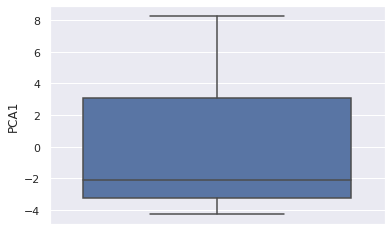

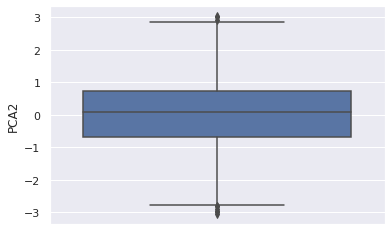

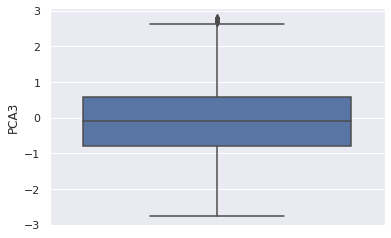

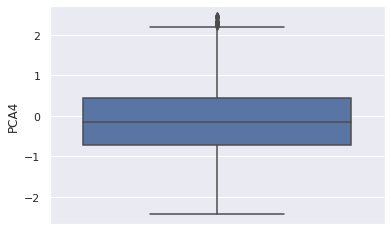

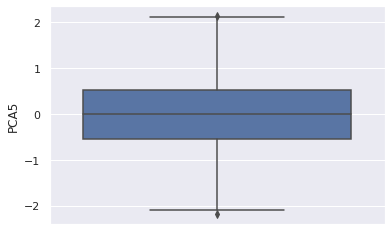

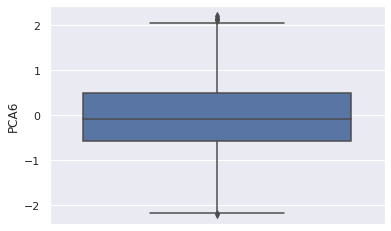

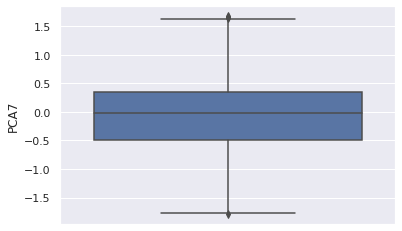

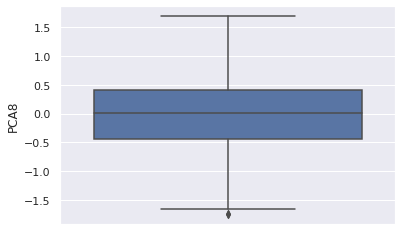

In [110]:
for col in .columns:
    sns.boxplot(data=pca_model_df_outlied,y=col)
    plt.show()

Oultier treatment was done for both the model and I am going to use pca_model_df_outlied for further procceding

In [182]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

IQR = q3 - q1

ul = q3 + 1.5 * IQR
ll = q1 - 1.5 * IQR
                        
df_outlied = df[~((df>ul)|(df<ll)).any(axis=1)]

a) Apply Clustering and visualize the spread of data

In [96]:
df['activity'].value_counts()

LAYING                280
STANDING              260
SITTING               234
WALKING_UPSTAIRS      229
WALKING               228
WALKING_DOWNSTAIRS    202
Name: activity, dtype: int64

In [111]:
err = []
for i in range(1,11):
    kmean_model = KMeans(n_clusters=i,random_state=1)
    kmean_model.fit_transform(pca_model_df_outlied)
    err.append(kmean_model.inertia_)

In [112]:
print(err)

[21633.63986494112, 7970.5070873380555, 6526.493691017202, 5767.7289413822955, 5368.02640805249, 5016.000557654184, 4753.684904272567, 4529.977716109728, 4334.968847219495, 4159.239591909733]


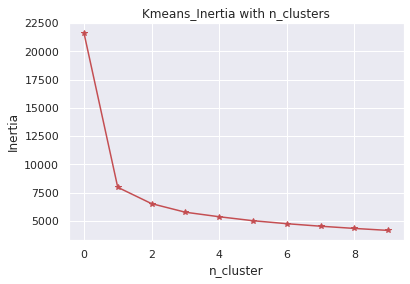

In [117]:
plt.plot(err,marker='*',color='r')
plt.title('Kmeans_Inertia with n_clusters')
plt.xlabel('n_cluster')
plt.ylabel('Inertia')
plt.show()

In [120]:

for i in range(2,11):
    kmean_model = KMeans(n_clusters=i,random_state=1)
    kmean_model.fit_transform(pca_model_df_outlied)
    s_score = silhouette_score(pca_model_df_outlied,kmean_model.labels_)
    print(f'Silhouette_score of {i} cluster is',s_score)

Silhouette_score of 2 cluster is 0.5388634498955411
Silhouette_score of 3 cluster is 0.4042425913420563
Silhouette_score of 4 cluster is 0.25594632558947567
Silhouette_score of 5 cluster is 0.21738272005657186
Silhouette_score of 6 cluster is 0.20186343674264529
Silhouette_score of 7 cluster is 0.18097745610926827
Silhouette_score of 8 cluster is 0.17653788468868373
Silhouette_score of 9 cluster is 0.16229416215821693
Silhouette_score of 10 cluster is 0.16540018860452987


Find the optimal number of cluster Value. 

By finding the Silhouette_score , I can say that Score with value nearer to 1 is good cluster.
And from the elbow curve also says that 2 cluster can make much impact.

In [122]:
kmean_model = KMeans(n_clusters=2,random_state=1)
kmean_model.fit_transform(pca_model_df_outlied)
kmean_model.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [125]:
kmodel_label = kmean_model.labels_
kmean_check_df = pca_model_df_outlied.copy()
kmean_check_df['k_mean_target'] = kmodel_label

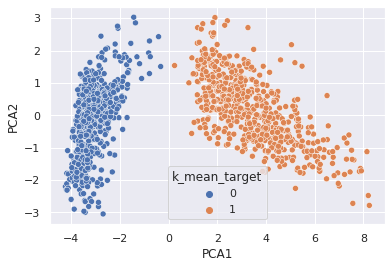

In [126]:
sns.scatterplot(data=kmean_check_df,x='PCA1',y='PCA2',hue='k_mean_target')

In [ ]:
sns.scatterplot(data=df_outlied,x='F1',y='F2',hue='k_mean_target')

In [138]:
DBScan_model = DBSCAN(eps = 1,min_samples=6)
DBScan_model.fit(pca_model_df_outlied,df['activity'])
DBScan_model.labels_

array([ 0,  0,  0, ...,  2,  2, -1])

In [139]:
DBScan_model_label = DBScan_model.labels_
DBScan_check_df = pca_model_df_outlied.copy()
DBScan_check_df['DBScan_target'] = DBScan_model_label

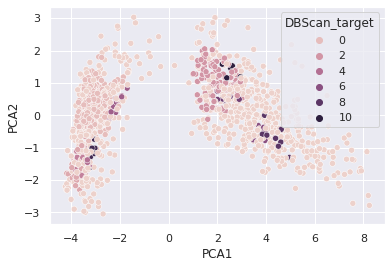

In [140]:
sns.scatterplot(data=DBScan_check_df,x='PCA1',y='PCA2',hue='DBScan_target')

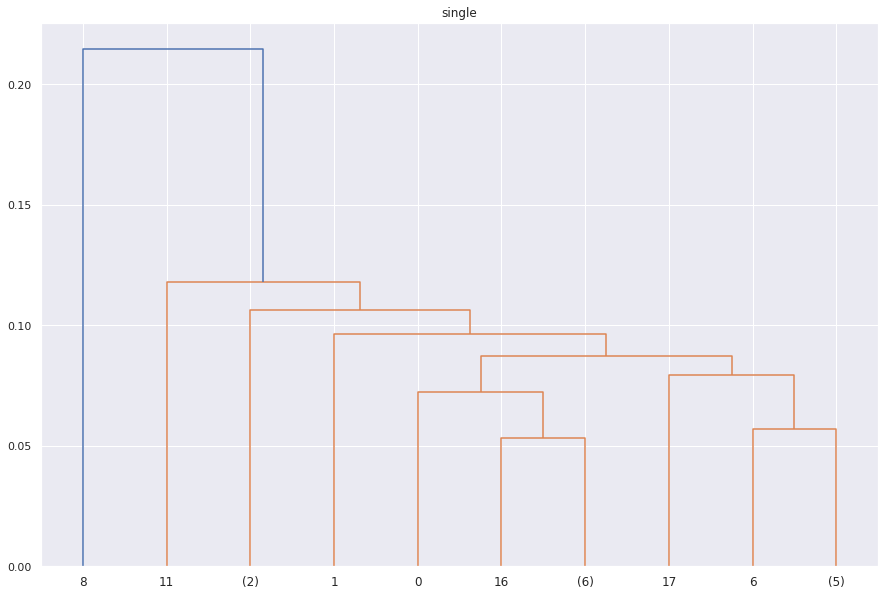

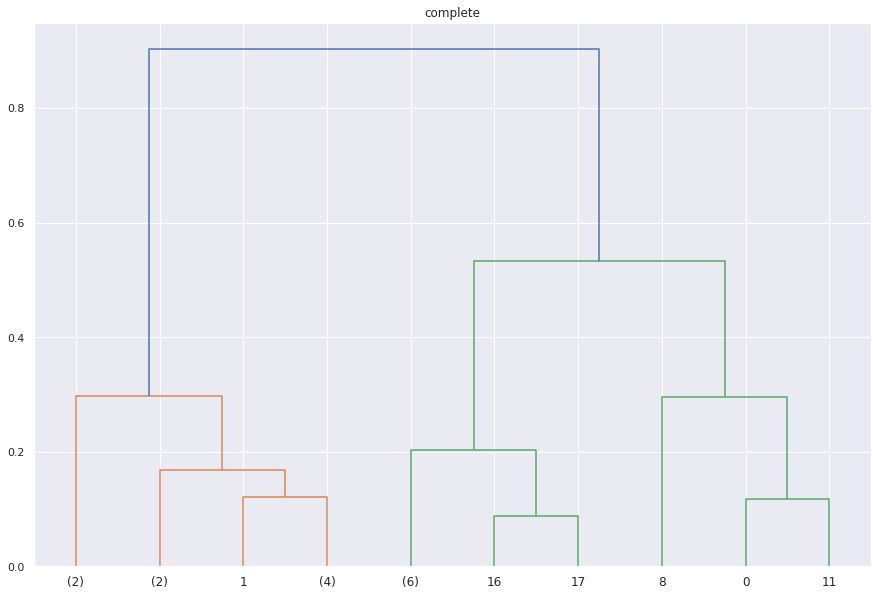

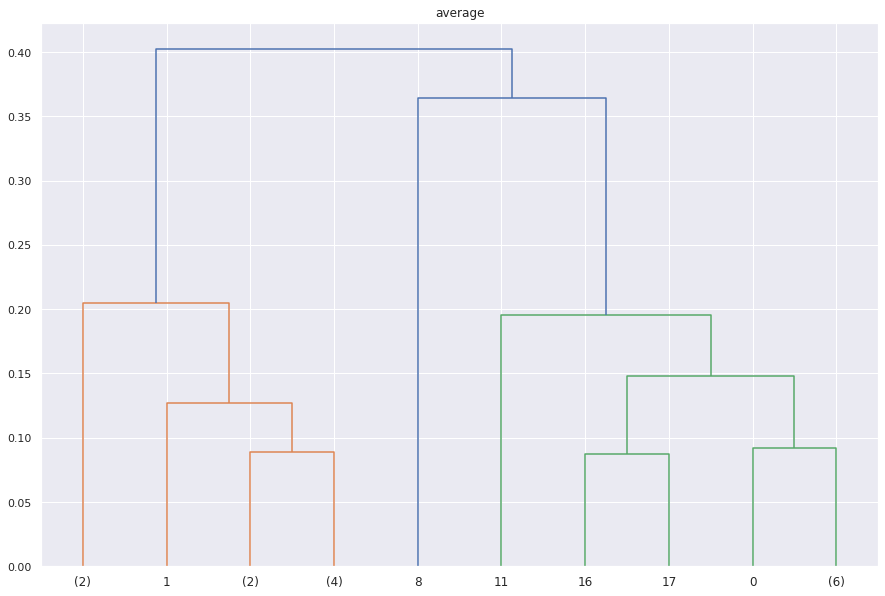

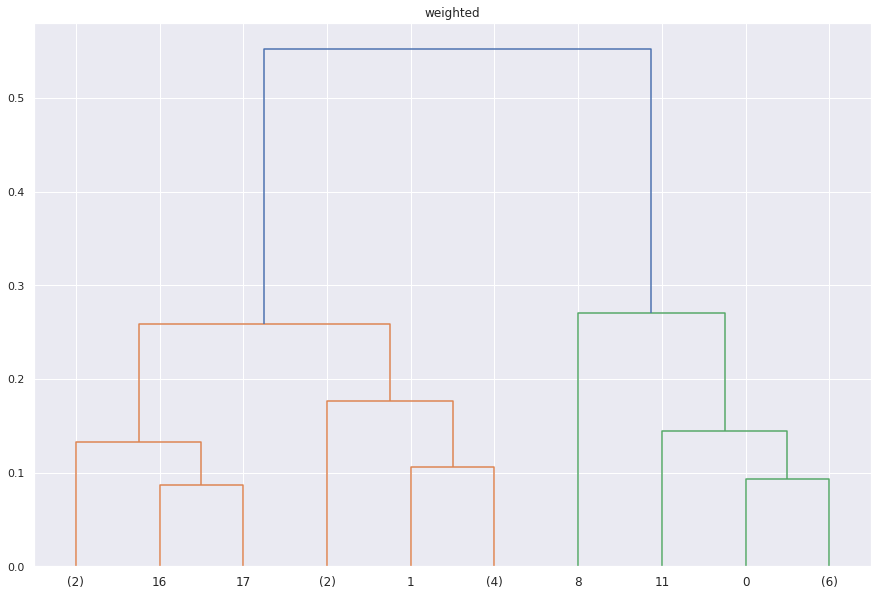

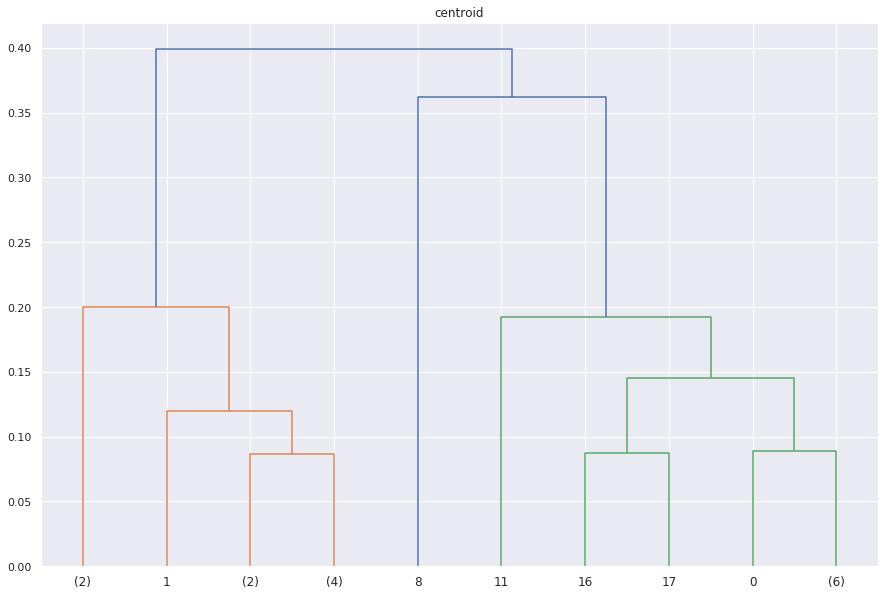

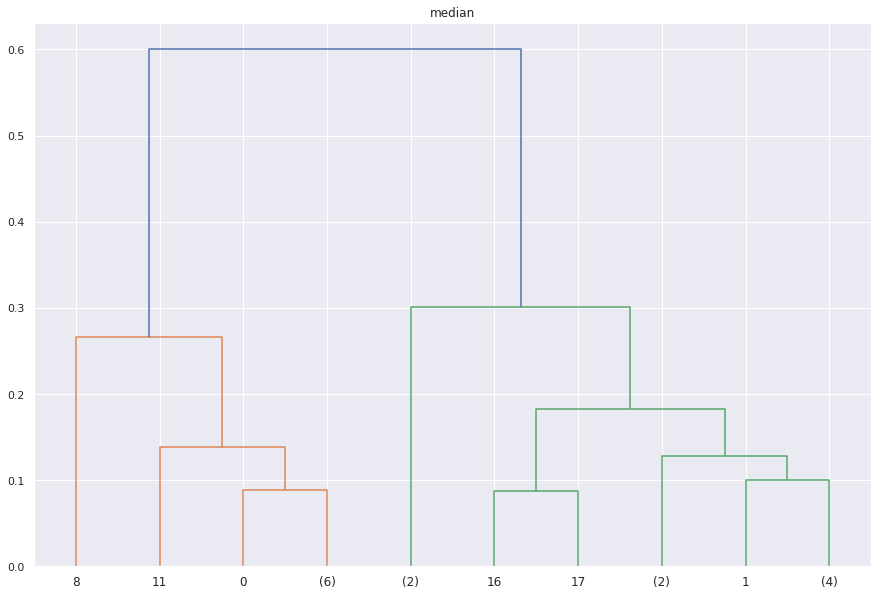

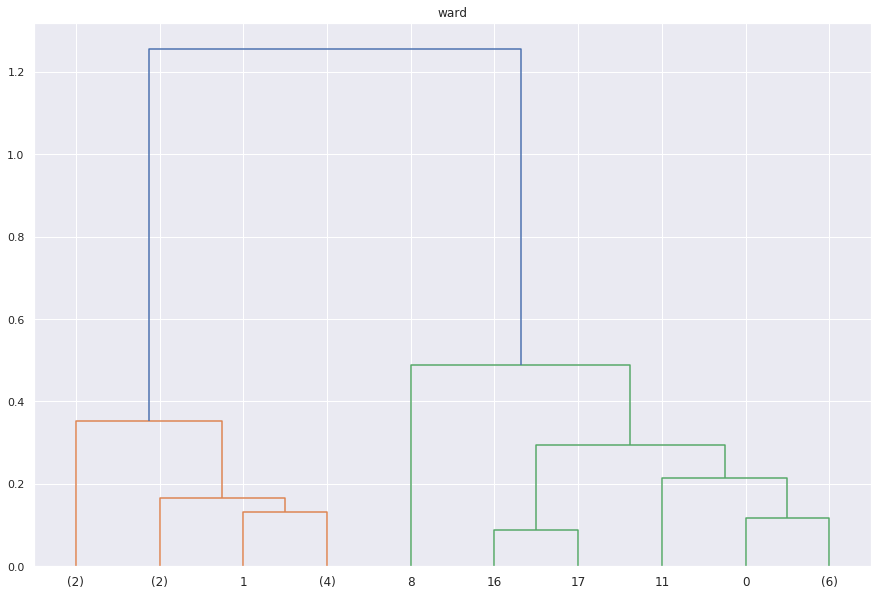

In [189]:
methods = ['single','complete','average','weighted','centroid','median','ward']
for method in methods:
    Z = linkage(y=cov_matrix ,method = method,metric='euclidean')
    fig = plt.figure(figsize = (15,10))
    dn = dendrogram(Z,truncate_mode = 'lastp',p=10)
    plt.title(method)
    plt.show()
    

from the methods took ward as the best cluster 

In [195]:
from sklearn.cluster import AgglomerativeClustering
Agg_cluster_model = AgglomerativeClustering(n_clusters=4,linkage='ward').fit(pca_model_df_outlied)

In [196]:
Agg_cluster_model.labels_

array([3, 1, 3, ..., 2, 2, 0])

In [199]:
Agg_cluster_model_df = pca_model_df_outlied.copy()
Agg_cluster_model_df['target'] = Agg_cluster_model.labels_

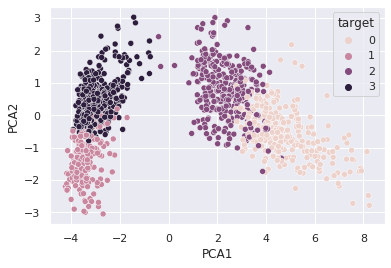

In [202]:
sns.scatterplot(data=Agg_cluster_model_df,x='PCA1',y='PCA2',hue='target')
plt.show()

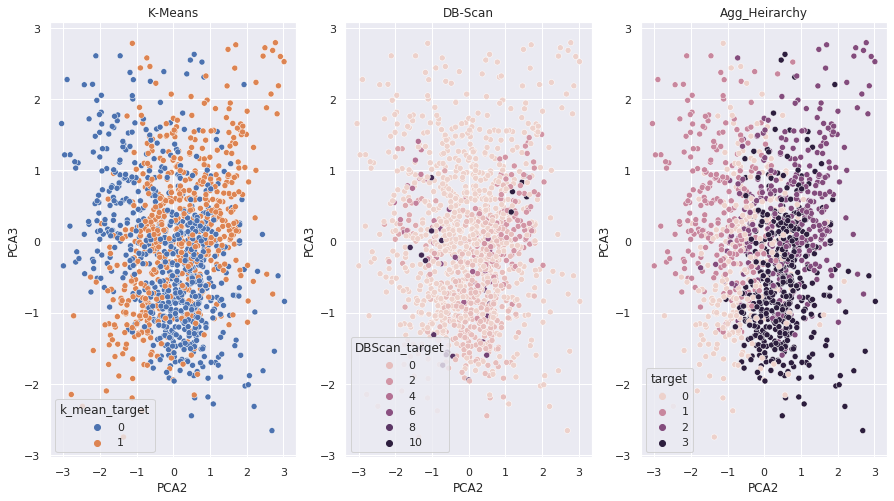

In [206]:
plt.figure(figsize=(15,8))
plt.subplot(1,3,1)
plt.title('K-Means')
sns.scatterplot(data=kmean_check_df,x='PCA2',y='PCA3',hue='k_mean_target')

plt.subplot(1,3,2)
plt.title('DB-Scan')
sns.scatterplot(data=DBScan_check_df,x='PCA2',y='PCA3',hue='DBScan_target')

plt.subplot(1,3,3)
plt.title('Agg_Heirarchy')
sns.scatterplot(data=Agg_cluster_model_df,x='PCA2',y='PCA3',hue='target')
plt.show()

The best cluster formed was from AgglomerativeClustering with linkage as ward choosen 4 clusters.


In [233]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

Agg_cluster_model = AgglomerativeClustering(n_clusters=4,linkage='ward').fit(pca_model_df_outlied)
Agg_cluster_model_df = pca_model_df_outlied.copy()
Agg_cluster_model_df['target'] = Agg_cluster_model.labels_

X =  Agg_cluster_model_df.drop(columns='target')
y =  Agg_cluster_model_df['target']

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state = 1)

# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)


In [234]:
%time
DT_model = DecisionTreeClassifier(criterion='entropy',min_samples_split=3,min_samples_leaf=2,max_features=4,random_state=1)
DT_model.fit(X_train,y_train)
pred_test = DT_model.predict(X_test)
accuracy_score(y_test,pred_test)

CPU times: user 9 µs, sys: 0 ns, total: 9 µs
Wall time: 7.87 µs


0.927461139896373

In [221]:
%time
RF_model = RandomForestClassifier(n_estimators = 50,criterion='entropy',min_samples_split=3,min_samples_leaf=2,max_features=4,random_state=1)
RF_model.fit(X_train,y_train)
pred_test = RF_model.predict(X_test)
accuracy_score(y_test,pred_test)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 7.87 µs


0.9481865284974094

In [226]:
DT_model.feature_importances_

array([0.64054289, 0.18364212, 0.07749153, 0.02872299, 0.03943229,
       0.01110536, 0.01637108, 0.00269174])

In [229]:
X =  Agg_cluster_model_df[['PCA1','PCA2']]
y =  Agg_cluster_model_df['target']

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state = 1)

%time
DT_model = DecisionTreeClassifier(criterion='entropy',min_samples_split=3,min_samples_leaf=2,random_state=1)
DT_model.fit(X_train,y_train)
pred_test = DT_model.predict(X_test)
accuracy_score(y_test,pred_test)


CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 7.87 µs


0.8678756476683938

In [231]:
X =  Agg_cluster_model_df[['PCA1','PCA2']]
y =  Agg_cluster_model_df['target']

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state = 1)

%time
RF_model = RandomForestClassifier(n_estimators = 50,criterion='entropy',min_samples_split=3,min_samples_leaf=2,random_state=1)
RF_model.fit(X_train,y_train)
pred_test = RF_model.predict(X_test)
accuracy_score(y_test,pred_test)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs


0.9196891191709845

By reducing the dimensions of the data, found that target variable is much important for four components.
To find the accuracy of the sensor signals were preprocessed the data and found some clusters using some pf the clustering techincs. And choosen the Agglometric cclusterinmg gives good cluster of sepeartion with radius 2 and min sample 4.then took this cluster data as target and build some of the random forest and decision tree models.Now the decisison tree model gives 92% accuracy with 7 mu seconds.but Random Forest overtook the performance of decision tree model with both accuracy and time as 94% and 0 mu wall secs.



What are the key risks to your results and interpretation?

In [235]:
from sklearn.metrics import classification_report

In [239]:

RF_model = RandomForestClassifier(n_estimators = 50,criterion='entropy',min_samples_split=3,min_samples_leaf=2,max_features=4,random_state=1)
RF_model.fit(X_train,y_train)
pred_test = RF_model.predict(X_test)



print(classification_report(y_test,pred_test))

print('Sometimes the remainig percent of F1-score may result in False Positive.It will affect the accuracy')

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        82
           1       0.91      0.93      0.92        74
           2       0.96      0.96      0.96        91
           3       0.96      0.95      0.96       139

    accuracy                           0.95       386
   macro avg       0.94      0.95      0.95       386
weighted avg       0.95      0.95      0.95       386

Sometimes the remainig percent of F1-score may result in False Positive.It will affect the accuracy
